## PROJECT ON :Predicting Hospital Length of Stay, using Machine Learning algorithms

### The source of the dataset is GitHub. This dataset consists of integer,float and object data types. This dataset consists of 28 columns and 100000 rows of data points. For the classification problem we consider the last column that is “lengthofstay” as the classification column and the other columns as the independent columns or the columns which supports the classification. In  this data set there are 2 date columns and 1 object column. Here the object column is transformed into an integer column and  the 2 date columns are dropped during the prepossessing step. The classification class used here is [1,17].

#### The columns are
#### Eid, vdate, rcount, dialysisrenalendstage, asthma, irondef, pneum, substancedependence, psychologicaldisordermajor, depress, psychother, fibrosisandother, malnutrition, hemo, hemocrit, neutrophils, sodium, glucose, bloodureanitro, creatinine, bmi, pulse, respiration, secondarydiagnosisnonicd9, discharged, facid, lengthofstay


# Importing required modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,r2_score,confusion_matrix

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Reading data set

In [2]:
data=pd.read_csv("C:\\Users\\ABHI\\OneDrive\\Documents\\LengthOfStay.csv")

In [3]:
data

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1/28/2012,3,M,0,0,0,0,0,0,...,171.422555,12.0,0.650323,30.063069,80,6.5,1,2/3/2012,B,6
99996,99997,8/6/2012,0,M,0,0,0,0,0,0,...,122.342450,12.0,1.521424,28.969548,61,6.5,1,8/7/2012,B,1
99997,99998,7/23/2012,1,M,0,0,1,0,0,0,...,108.288106,12.0,1.025677,26.354919,61,6.9,1,7/27/2012,C,4
99998,99999,12/19/2012,0,M,0,0,0,0,0,0,...,111.750731,16.0,1.035400,29.193462,59,5.6,1,12/23/2012,B,4


# EDA on the data set

In [4]:
data.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [6]:
data.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [7]:
cor=data.corr()

<AxesSubplot:>

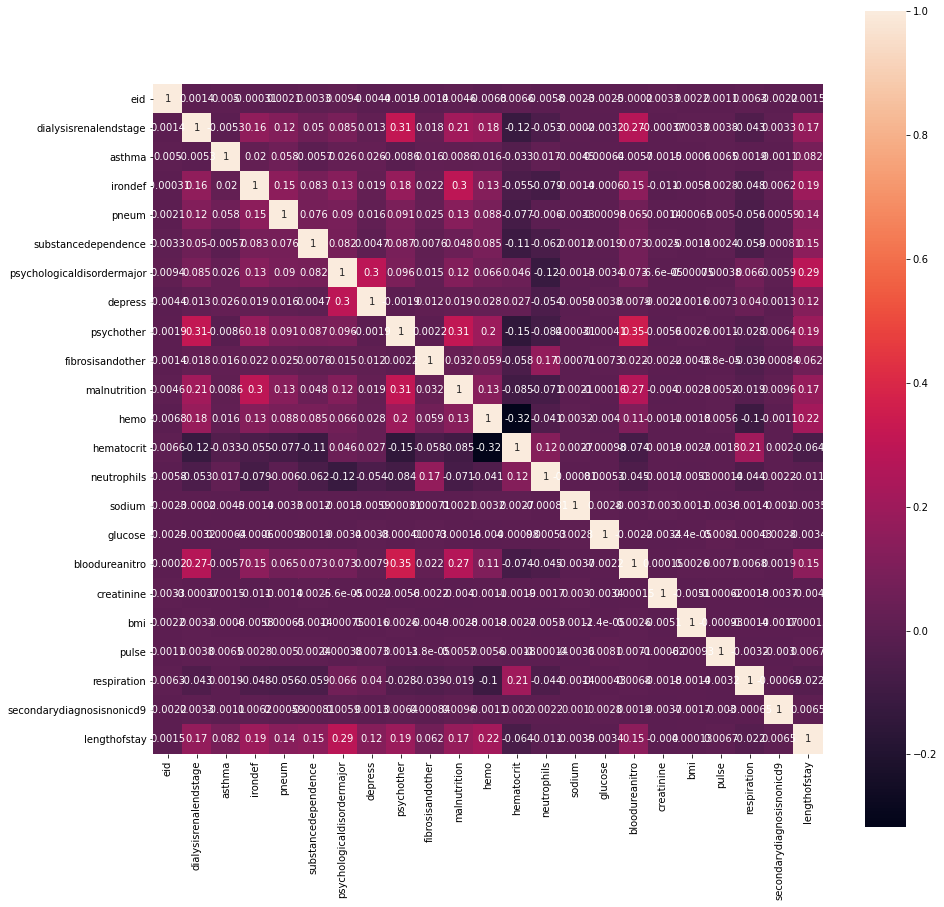

In [8]:
f,ax=plt.subplots(figsize = (15,15))
ax=sns.heatmap(cor, square=True, annot=True)
ax

In [9]:
data.nunique()

eid                           100000
vdate                            367
rcount                             6
gender                             2
dialysisrenalendstage              2
asthma                             2
irondef                            2
pneum                              2
substancedependence                2
psychologicaldisordermajor         2
depress                            2
psychother                         2
fibrosisandother                   2
malnutrition                       2
hemo                               2
hematocrit                       362
neutrophils                      656
sodium                         99948
glucose                        99998
bloodureanitro                   261
creatinine                     99994
bmi                            99994
pulse                            100
respiration                      160
secondarydiagnosisnonicd9         11
discharged                       378
facid                              5
l

Checking relations of some variables with the dependent variable

In [10]:
data1=data.drop("vdate",axis=1)
data2=data1.drop("discharged",axis=1)

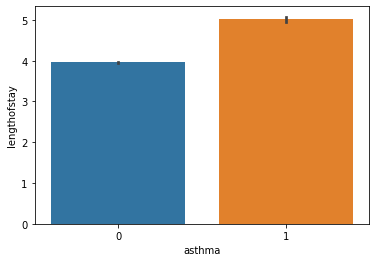

In [11]:
sns.barplot(data2["asthma"],data2['lengthofstay'])
plt.show()

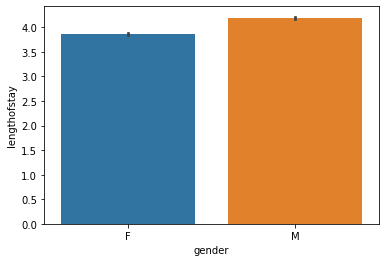

In [12]:
sns.barplot(data2["gender"],data2['lengthofstay'])
plt.show()

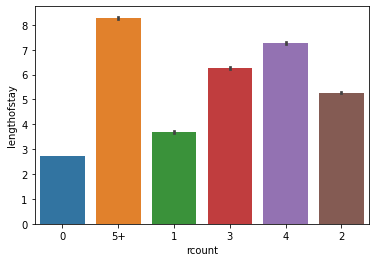

In [13]:
sns.barplot(data2["rcount"],data2['lengthofstay'])
plt.show()

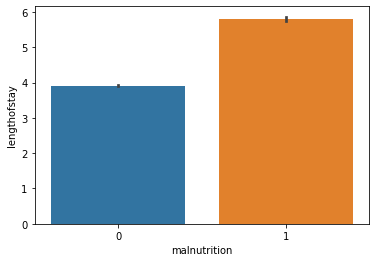

In [75]:
sns.barplot(data2["malnutrition"],data2['lengthofstay'])
plt.show()

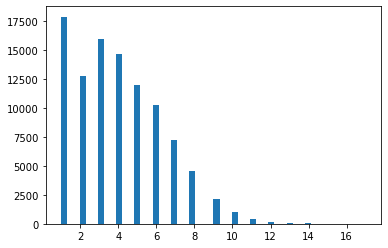

In [77]:
plt.hist(data['lengthofstay'],bins=50)
plt.show()

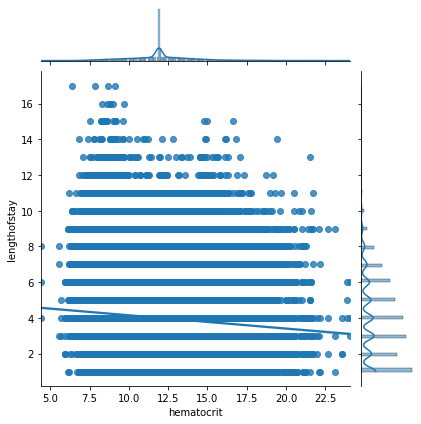

In [16]:
sns.jointplot(data2['hematocrit'],data2['lengthofstay'],data=data,kind ='reg')

<AxesSubplot:xlabel='lengthofstay', ylabel='count'>

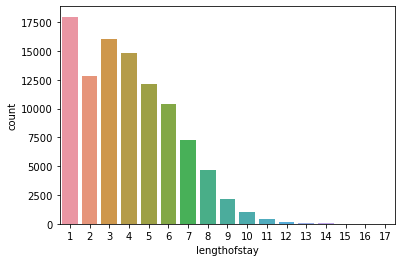

In [17]:
sns.countplot("lengthofstay",data=data2)

<AxesSubplot:xlabel='gender', ylabel='count'>

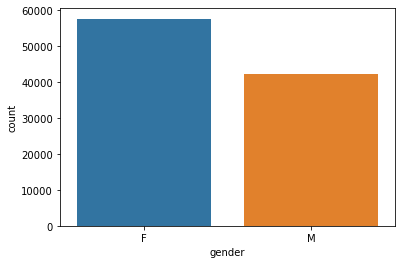

In [18]:
sns.countplot("gender",data=data2)

The inference about the plots are that the people with asthma is more likely to get admitted in the hospital for more days
In this data set there is more female data than male data. That is more females are likely to go to hospital than men.But more men are admitted to hospital than women. When comparing the admitted days more people will leave the hospital during the first few days.

# Pre Processing

Changing the object value to integer value 

In [19]:
data["rcount"].mask(data['rcount']=='5+',5,inplace=True)

In [20]:
x=data['rcount'].astype(int)
data.rcount=x

using Laber encoder changing the values of the 2 object columns

In [21]:
le=LabelEncoder()
data['gender']=le.fit_transform(data['gender'])
data['facid']=le.fit_transform(data['facid'])


Removing the outliers in the glucose column

In [22]:
Q1=np.percentile(data['glucose'],25,interpolation='midpoint')
Q3=np.percentile(data['glucose'],75,interpolation='midpoint')
IQR=Q3-Q1
upper=np.where(data['glucose']>=(Q3+1.5*IQR))
lower=np.where(data['glucose']<=(Q1-1.5*IQR))
data.drop(upper[0],inplace=True)
data.drop(lower[0],inplace=True)

Removing the date columns from the data set

In [23]:
data['vdate']=pd.to_datetime(data['vdate'])
data['discharged']=pd.to_datetime(data['discharged'])

In [24]:
data1=data.drop("vdate",axis=1)
data2=data1.drop("discharged",axis=1)
data.rcount=x

using boxplot determining the outliers

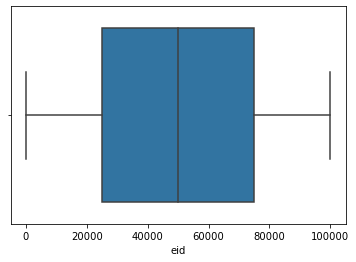

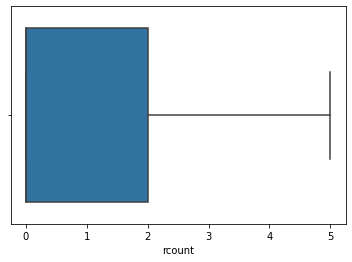

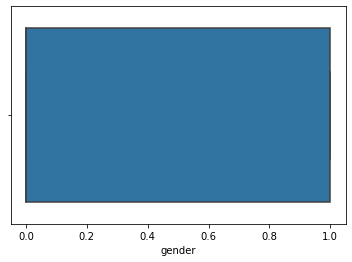

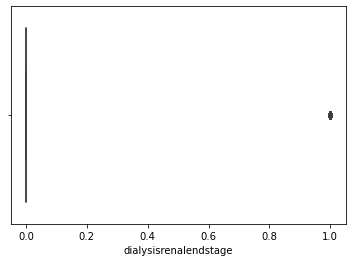

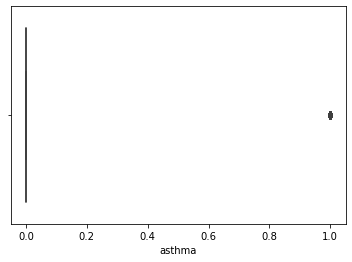

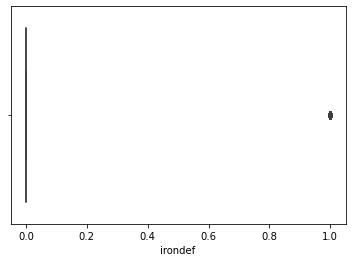

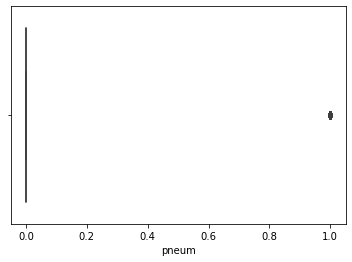

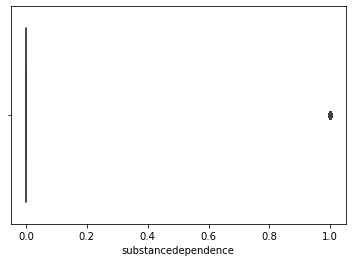

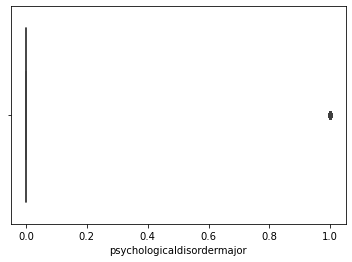

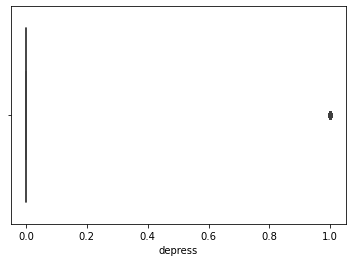

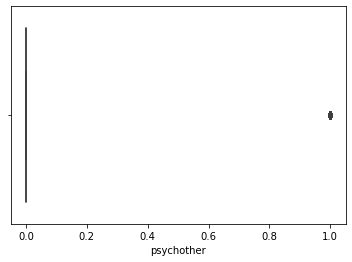

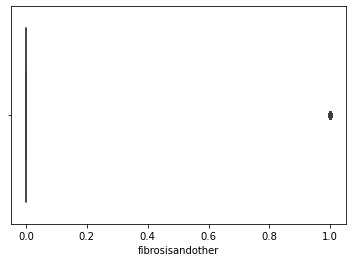

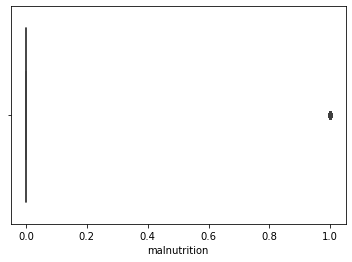

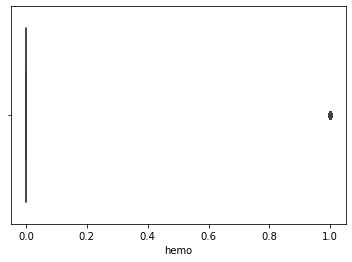

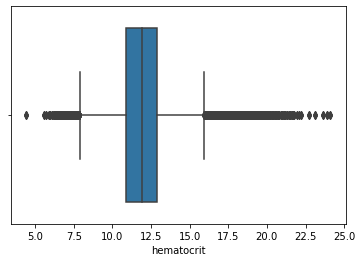

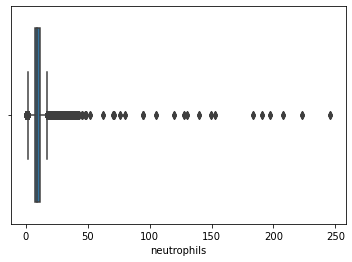

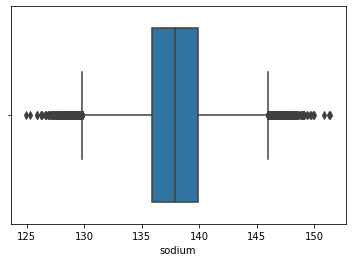

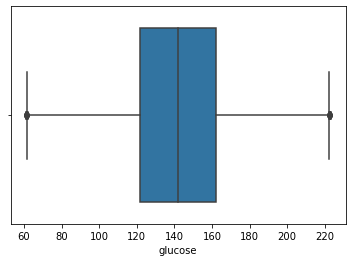

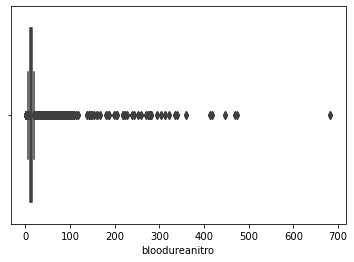

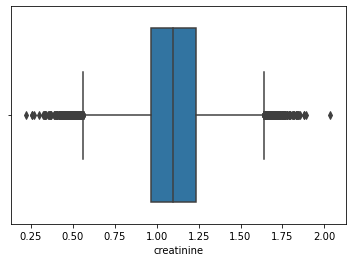

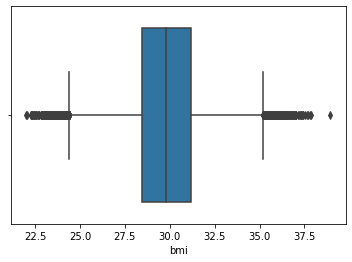

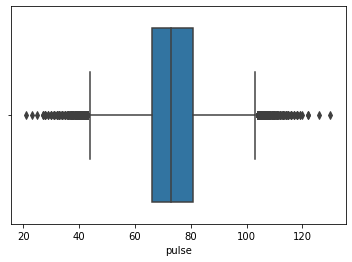

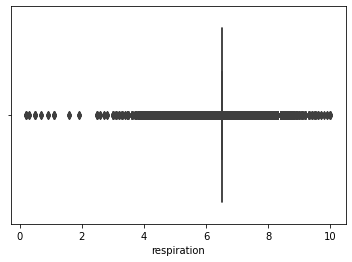

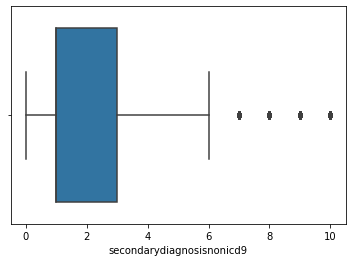

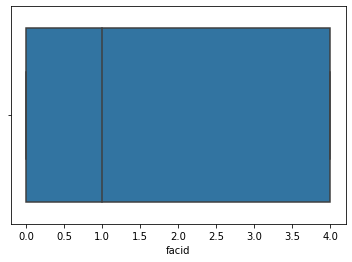

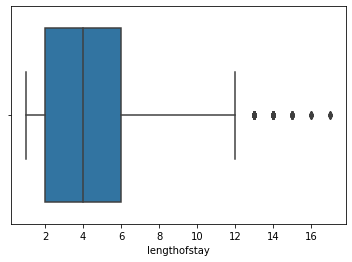

In [25]:
for i in data2:
    sns.boxplot(data2[i])
    plt.show()


Splitting to x and y

In [26]:
x=data2.drop("lengthofstay",axis=1)
y=data2["lengthofstay"]

In [27]:
x.describe()

,eid,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid
count,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,...,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000,99305.000000
mean,49993.607522,1.118363,0.423544,0.036403,0.035245,0.094900,0.039454,0.062958,0.239001,0.051599,...,10.178873,137.890967,142.000211,14.094460,1.099240,29.806039,73.440592,6.493633,2.122562,1.758743
std,28873.200780,1.542912,0.494122,0.187292,0.184399,0.293078,0.194674,0.242888,0.426476,0.221216,...,5.359787,2.999653,29.113636,12.931427,0.200204,2.003588,11.648110,0.568559,2.049824,1.648818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,60.968245,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,0.000000
25%,24983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.870597,121.864306,11.000000,0.964650,28.454376,66.000000,6.500000,1.000000,0.000000
50%,49991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887127,142.103249,12.000000,1.098650,29.808008,73.000000,6.500000,1.000000,1.000000
75%,74993.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.913209,162.056868,14.000000,1.234795,31.157138,81.000000,6.500000,3.000000,4.000000
max,100000.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,222.912111,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,4.000000


feature selection

In [28]:
test=SelectKBest(score_func=chi2,k=15)
fit=test.fit(x,y)

In [29]:
#summarize scores
np.set_printoptions(precision=2)
print(fit.scores_)
print(x.iloc[0:5,:])

[2.43e+05 1.34e+05 3.80e+02 3.18e+03 1.65e+03 4.68e+03 2.24e+03 3.04e+03
 1.10e+04 2.40e+03 3.92e+03 4.99e+02 3.36e+03 4.94e+03 2.59e+02 8.61e+02
 1.67e+00 1.30e+02 3.00e+04 9.09e-01 3.62e+00 5.15e+01 1.07e+01 3.20e+01
 3.50e+04]
   eid  rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
0    1       0       0                      0       0        0      0   
1    2       5       0                      0       0        0      0   
2    3       1       0                      0       0        0      0   
3    4       0       0                      0       0        0      0   
4    5       0       0                      0       0        0      1   

   substancedependence  psychologicaldisordermajor  depress  ...  neutrophils  \
0                    0                           0        0  ...        14.20   
1                    0                           0        0  ...         4.10   
2                    0                           0        0  ...         8.90   
3      

In [30]:
model=LogisticRegression()
rfe=RFE(model,15,verbose=1)
fit=rfe.fit(x,y)
print("num features:%s"%(fit.n_features_))
print("Selected features: %s"%(fit.support_))
print("Feature Ranking: %s"%(fit.ranking_))

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
num features:15
Selected features: [ True  True False False False  True False False  True False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True]
Feature Ranking: [ 1  1  3 10  9  1  8  4  1  5  6 11  7  2  1  1  1  1  1  1  1  1  1  1
  1]


In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99305 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   eid                         99305 non-null  int64  
 1   rcount                      99305 non-null  int32  
 2   gender                      99305 non-null  int32  
 3   dialysisrenalendstage       99305 non-null  int64  
 4   asthma                      99305 non-null  int64  
 5   irondef                     99305 non-null  int64  
 6   pneum                       99305 non-null  int64  
 7   substancedependence         99305 non-null  int64  
 8   psychologicaldisordermajor  99305 non-null  int64  
 9   depress                     99305 non-null  int64  
 10  psychother                  99305 non-null  int64  
 11  fibrosisandother            99305 non-null  int64  
 12  malnutrition                99305 non-null  int64  
 13  hemo                        993

changing x and y to xcls and ycls with the required features

In [32]:
xcls=data2.drop(['eid','gender','asthma','dialysisrenalendstage','substancedependence','depress','pneum','psychother','fibrosisandother','malnutrition','hemo'],axis=1)
ycls=data2['lengthofstay']

Splitting X and Y to training and testing subsets

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(xcls,ycls,test_size=0.4,random_state=0)

Standardizing the variables using Standard scaler

In [34]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

# Model building & Prediction

## 1.Logistic Regression

In [35]:
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
pred1=model1.predict(xtest)
pred1

array([2, 3, 2, ..., 5, 1, 1], dtype=int64)

In [36]:
ytest

89758    2
67216    3
5089     2
10749    4
71469    6
        ..
90718    1
89079    9
43661    5
53641    1
83475    1
Name: lengthofstay, Length: 39722, dtype: int64

Testing accuracy

In [37]:
acc1=accuracy_score(ytest,pred1)
acc1

0.9798096772569357

In [38]:
#train accuracy
predt=model1.predict(xtrain)
acct=accuracy_score(predt,ytrain)
acct

0.9790879948978736

Confusion Matrix

In [39]:
mat = confusion_matrix(pred1,ytest)
mat

array([[7221,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0, 5082,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0, 6383,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5876,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4704,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    2, 4164,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2884,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1855,  168,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

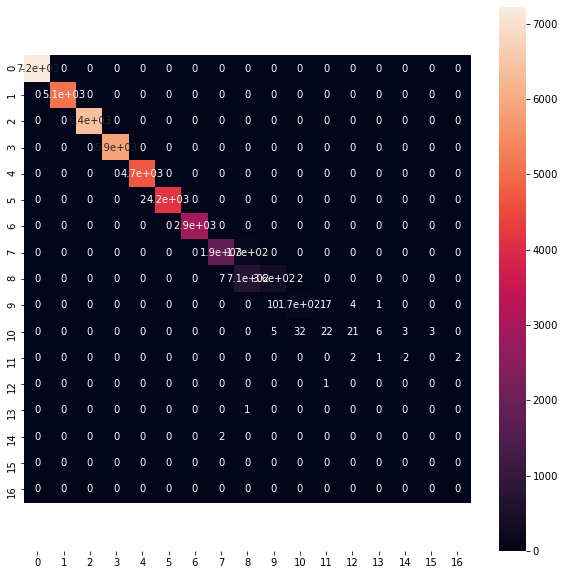

In [40]:
f,ax=plt.subplots(figsize = (10,10))
ax=sns.heatmap(mat, square=True, annot=True)
plt.axis('equal')
plt.show()

[[7221    0]
 [   0    0]]


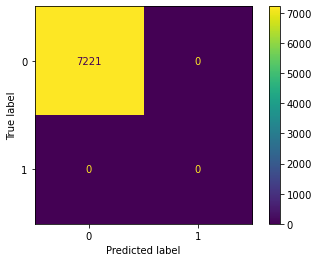

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,pred1,labels=[1, 17])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Classification Report

In [42]:
print(classification_report(pred1, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7221
           2       1.00      1.00      1.00      5082
           3       1.00      1.00      1.00      6383
           4       1.00      1.00      1.00      5876
           5       1.00      1.00      1.00      4704
           6       1.00      1.00      1.00      4166
           7       1.00      1.00      1.00      2884
           8       1.00      0.92      0.95      2023
           9       0.81      0.66      0.72      1080
          10       0.03      0.05      0.03       200
          11       0.16      0.35      0.22        92
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy              

## 2.Random Forest

In [43]:
model=RandomForestClassifier(random_state=0)
model.fit(xtrain,ytrain)
predR=model.predict(xtest)

Accuracy

In [44]:
accR=accuracy_score(predR,ytest)
accR

0.9867076179447157

In [45]:
pred22=model.predict(xtrain)
accR=accuracy_score(pred22,ytrain)
accR

1.0

Confusion Matrix

In [46]:
mat1 = confusion_matrix(predR,ytest)
mat1

array([[7221,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0, 5082,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0, 6383,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5876,    0,    1,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4706,    0,    2,    1,    1,    1,    0,
           1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4163,   17,   53,   12,   12,    4,
           0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2863,    9,   34,   10,    8,
           1,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1798,   21,   35,   19,
           0,    3,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

<AxesSubplot:>

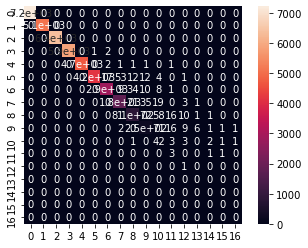

In [47]:
sns.heatmap(mat1, square=True, annot=True)

Classiication Report

In [48]:
print(classification_report(predR, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7221
           2       1.00      1.00      1.00      5082
           3       1.00      1.00      1.00      6383
           4       1.00      1.00      1.00      5879
           5       1.00      1.00      1.00      4712
           6       1.00      0.98      0.99      4262
           7       0.99      0.98      0.99      2925
           8       0.96      0.96      0.96      1877
           9       0.92      0.84      0.88       968
          10       0.66      0.70      0.68       354
          11       0.21      0.79      0.33        53
          12       0.07      0.60      0.13         5
          13       0.04      1.00      0.07         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy              

[[7221    0]
 [   0    0]]


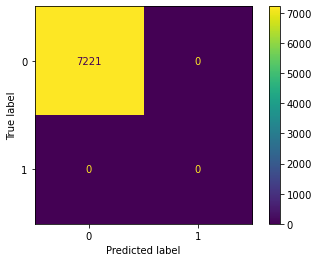

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,predR,labels=[1, 17])
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 3.SVM

In [50]:
model3=SVC(kernel='rbf',random_state=1)
model3.fit(xtrain,ytrain)

SVC(random_state=1)

In [51]:
pred3=model3.predict(xtest)

In [52]:
acc3=accuracy_score(pred3,ytest)
acc3

0.9873118171290469

In [53]:
#train Accuracy
preds=model3.predict(xtrain)
accs=accuracy_score(preds,ytrain)
acc3

0.9873118171290469

In [54]:
mat3 = confusion_matrix(pred3,ytest)
mat3

array([[7214,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   7, 5075,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    4, 6366,    2,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    1,   10, 5863,    5,    1,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    2,    6,    7, 4669,    1,    2,    2,    1,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    3,   29, 4161,   35,   12,    6,    2,    2,
           0,    0,    0,    0,    0,    1],
       [   0,    0,    0,    1,    2,    1, 2845,   16,    2,    1,    1,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1, 1824,   25,    1,    1,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

<AxesSubplot:>

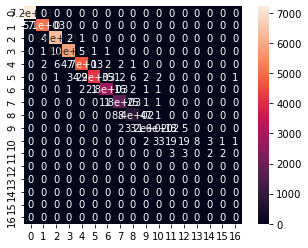

In [55]:
sns.heatmap(mat3, square=True, annot=True)

In [56]:
print(classification_report(pred3, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7214
           2       1.00      1.00      1.00      5082
           3       1.00      1.00      1.00      6373
           4       1.00      1.00      1.00      5881
           5       0.99      1.00      0.99      4690
           6       1.00      0.98      0.99      4252
           7       0.99      0.99      0.99      2869
           8       0.98      0.98      0.98      1852
           9       0.96      0.94      0.95       897
          10       0.86      0.63      0.73       516
          11       0.16      0.38      0.23        86
          12       0.07      0.30      0.12        10
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy              

## 4.Gaussian NB

In [57]:
model4=GaussianNB()
model4.fit(xtrain,ytrain)
pred4=model4.predict(xtest)


In [58]:
acc4=accuracy_score(pred1,ytest)
acc4

0.9798096772569357

In [59]:
#train Accuracy
predg=model4.predict(xtrain)
accg=accuracy_score(predg,ytrain)
accg

1.0

In [60]:
mat4 = confusion_matrix(pred4,ytest)
mat4

array([[7221,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0, 5082,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0, 6383,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5876,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 4706,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4164,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 2884,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1864,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

<AxesSubplot:>

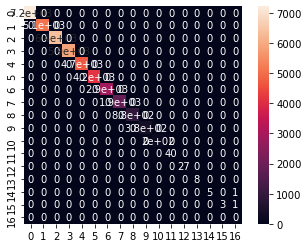

In [61]:
sns.heatmap(mat4, square=True, annot=True)

In [62]:
print(classification_report(pred4, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7221
           2       1.00      1.00      1.00      5082
           3       1.00      1.00      1.00      6383
           4       1.00      1.00      1.00      5876
           5       1.00      1.00      1.00      4706
           6       1.00      1.00      1.00      4164
           7       1.00      1.00      1.00      2884
           8       1.00      1.00      1.00      1864
           9       1.00      1.00      1.00       878
          10       1.00      1.00      1.00       377
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00         8
          15       1.00      0.83      0.91         6
          16       1.00      0.75      0.86         4
          17       0.00      0.00      0.00         0

    accuracy              

## 5.KNN Classifier

In [63]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(xtrain,ytrain)
predknn=knn.predict(xtest)

In [64]:
accknn=accuracy_score(predknn,ytest)
accknn

0.5581289965258547

In [65]:
#train Accuracy
predk=knn.predict(xtrain)
acck=accuracy_score(predk,ytrain)
acck

0.6144370038433782

In [66]:
mat5 = confusion_matrix(predknn,ytest)
mat5

array([[7010, 2177,  327,    6,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 159, 2708, 1700,  382,   33,    3,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  52,  188, 4127, 2674,  581,  116,    2,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    7,  217, 2609, 1821,  655,   69,   24,    2,    1,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    2,   12,  197, 2115, 1476,  370,  134,   22,    6,    2,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    7,  153, 1809, 1050,  379,   88,   35,   11,
           2,    3,    0,    0,    0,    1],
       [   0,    0,    0,    1,    2,  105, 1309,  882,  333,   71,   25,
           4,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   81,  427,  383,  192,   74,
          15,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    2

<AxesSubplot:>

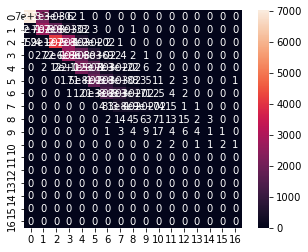

In [67]:
sns.heatmap(mat5, square=True, annot=True)

In [68]:
print(classification_report(predknn, ytest))

              precision    recall  f1-score   support

           1       0.97      0.74      0.84      9521
           2       0.53      0.54      0.54      4986
           3       0.65      0.53      0.58      7741
           4       0.44      0.48      0.46      5405
           5       0.45      0.49      0.47      4336
           6       0.43      0.51      0.47      3538
           7       0.45      0.48      0.47      2734
           8       0.23      0.36      0.28      1174
           9       0.05      0.20      0.08       228
          10       0.02      0.18      0.04        50
          11       0.01      0.22      0.02         9
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0

    accuracy              

## 6.XGBoost

In [69]:
model6 = XGBClassifier()
model6.fit(xtrain, ytrain)
predxg=model6.predict(xtest)

[15:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
accxg=accuracy_score(predxg,ytest)
accxg

0.9999244751019586

In [71]:
#train Accuracy
predx=model6.predict(xtrain)
accx=accuracy_score(predx,ytrain)
accx

1.0

In [72]:
mat6 = confusion_matrix(predknn,ytest)
mat6

array([[7010, 2177,  327,    6,    1,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [ 159, 2708, 1700,  382,   33,    3,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  52,  188, 4127, 2674,  581,  116,    2,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    7,  217, 2609, 1821,  655,   69,   24,    2,    1,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    2,   12,  197, 2115, 1476,  370,  134,   22,    6,    2,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    7,  153, 1809, 1050,  379,   88,   35,   11,
           2,    3,    0,    0,    0,    1],
       [   0,    0,    0,    1,    2,  105, 1309,  882,  333,   71,   25,
           4,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,   81,  427,  383,  192,   74,
          15,    1,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    2

<AxesSubplot:>

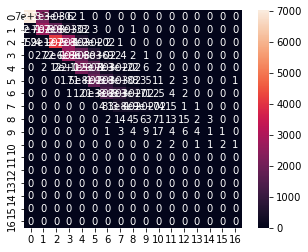

In [73]:
sns.heatmap(mat6, square=True, annot=True)

In [74]:
print(classification_report(predxg, ytest))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7221
           2       1.00      1.00      1.00      5082
           3       1.00      1.00      1.00      6383
           4       1.00      1.00      1.00      5876
           5       1.00      1.00      1.00      4706
           6       1.00      1.00      1.00      4164
           7       1.00      1.00      1.00      2884
           8       1.00      1.00      1.00      1864
           9       1.00      1.00      1.00       878
          10       1.00      1.00      1.00       377
          11       1.00      1.00      1.00       202
          12       1.00      1.00      1.00        40
          13       1.00      1.00      1.00        27
          14       1.00      1.00      1.00         8
          15       1.00      0.71      0.83         7
          16       0.33      0.50      0.40         2
          17       0.50      1.00      0.67         1

    accuracy              

# Conclusion


In this study, we analysed different variables correlating with LOS by using given  data. We considered how to improve the management of LOS among inpatients.
Research on the duration of hospital stay is important because it helps hospitals to more effectively manage its resources and patients. Specifically, identifying factors which are associated with the LOS in order to accurately predict and manage the number of inpatient days, could be helpful in terms of managing hospital resources and may enable the development of a Clinical Pathway useful for inpatient treatment.
Based on the variables identified in this study, it may be necessary to improve the financial structure of hospitals and develop institutional approaches to reduce patient medical fees, by promoting the effective use of hospital resources and reducing the length of hospital stay via a system subject to continuous monitoring. Eliminating unnecessary hospital stays is a strategy to reduce overall national medical expenses.
From the above models we can come to a conclusion that nearly all the models that that used above provides great testing and training accuracy. But the KNN does not provide good accuracy. This is because of the number of data points in the data set. The data set contains more than 1 Lakh data points. And also in the description of KNN we come to know that as the size of the data set increases the fitting becomes much slower and the accuracy may decrease considerably. So from these classification models we may choose any of the models except the KNN. 
